<img src="images/ScDo-Bandeau_Lingua_Technologies.png" style="width: 100%;float:center;"/>

<h1 style="font-size:250%;text-align:center">Prédiction de l'évolution temporelle de la</h1>
<h1 style="font-size:250%;text-align:center">pandémie du COVID-19</h1>
<h1 style="font-size:250%;text-align:center">modèles prédictifs</h1>
<h4 style="font-size:150%;text-align:center">par Claude COULOMBE</h4>
<h5 style="font-size:100%;text-align:center">PhD, scientifique de données, consultant Lingua Technologies</h5>


<img src="images/ScDo-pandas_logo.png" width=400 />

Pour contrer l'anxiété de la pandémie de COVID-19, rien de mieux que d'agir. J'ai donc préparé un petit carnet Web Python, prétexte pour un petit exercice d'exploration de données avec Pandas. Maintenant un petit carnet web IPython avec des modèles prédictifs. 

**Attention!** Je ne suis pas épidémiologiste! Il s'agit d'un exercice «amateur» réalisé comme un loisir scientifique. Je suis ouvert à la discussion pour améliorer mes modèles et pour le plaisir d'apprendre. Aussi ces modèles ne sont bons que pour faire des prédictions à court terme. Par exemple. pour prédire un cycle épidémique, un modèle ARIMA ou d'ajustement de courbes doit disposer d'au moins un cycle complet de données. 

Une autre approche consisterait à se baser sur le comportement de l'épidémie en Chine et ajuster les paramètres aux données locales. J'ignore toutefois si cela donnerait des résultats fiables. 

**Note:** Pour faire des prédictions plus complètes et à plus long terme, des simulations avec des modèles mathématiques à base d'équations différentielles seraient plus appropriées (https://bit.ly/2JEMe3g). D'ailleurs certains paramètres de ces modèles peuvent être extraits des données. Pour avoir une idée du fonctionnment de tels modèles, avec des simulations-jouets, allez voir les capsules vidéos de Grant Sanderson (3Blue1Brown), mon infographiste scientifique préféré: https://bit.ly/33Umjhe

<hr style="height:1px">

**Références:**

COVID-19: Time Series Analysis With ARIMA Modelling<br/>
https://bit.ly/2xK3GAI

Epidemiology and ARIMA model of positive-rate of influenza viruses among children in Wuhan, China: A nine-year retrospective study<br/>
https://bit.ly/3dJAfiJ

Application of the ARIMA model on the COVID-2019 epidemic dataset<br/>
https://bit.ly/2xMfFNR

Forecasting of COVID-19 Confirmed Cases in Different Countries with ARIMA Models<br/>
https://bit.ly/2UTRe9b

<hr style="height:1px">

<h3><i>« Prédire est difficile, surtout lorsqu’il s’agit de l’avenir »</i></h3><br/>
<div style="margin-left:450px">proverbe danois</div>

<hr style="height:1px">

### Importation des bibliothèques utilisées

In [211]:
# Importation des bibliothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *
%matplotlib inline

print("Bibliothèques importées!")

Bibliothèques importées!


## Données

### Dépôt de données ouvertes du COVID-19 - John Hopkins University


https://github.com/CSSEGISandData/COVID-19

<img src="" style="width: 100%;float:center;"/>

**Note** : Les données contenues dans le répertoire DATA doivent être mise à jour régulièrement pour refléter l'évolution de la pandémie dans le temps. 


### Lecture des données

Nous nous intéressons au fichier `time_series_19-covid-Confirmed.csv` qui contient les données sur les cas confirmés de COVID-19

wget --no-check-certificate https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv?raw=True -O time_series_covid19_confirmed_global.csv

In [212]:
# Note - bonne pratique de postfixer les Dataframe par _df (Rappel: Python n'est pas typé)
series_chronologiques_COVID19_df = pd.read_csv('DATA/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv',sep=',')


In [213]:
!pwd

/home/user/evolution_COVID19


In [214]:
series_chronologiques_COVID19_df


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/22/23,2/23/23,2/24/23,2/25/23,2/26/23,2/27/23,2/28/23,3/1/23,3/2/23,3/3/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,209181,209215,209230,209246,209274,209308,209322,209340,209358,209362
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,334336,334345,334356,334373,334378,334380,334391,334408,334408,334427
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271431,271432,271436,271439,271440,271440,271441,271448,271463,271469
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47866,47866,47866,47866,47866,47866,47866,47875,47875,47875
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,105205,105205,105205,105205,105205,105255,105255,105277,105277,105277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,342831,342831,342831,342831,342831,342831,343012,343012,343079,343079


### Retrait d'attributs «superflus»

Puisque nous nous intéressons à l'évolution du nombre de malades dans le temps, certains attributs (colonnes du tableau de données) sont superflus ou «inutiles» et alourdissent notre analyse.

Ci-dessous une liste d'attributs à retirer:

In [215]:
attributs_a_retirer = ["Lat","Long"]


Retirer les attributs «superflus» avec la fonction `.drop()`

In [216]:
series_chronologiques_COVID19_df = series_chronologiques_COVID19_df.drop(attributs_a_retirer,axis='columns')


In [217]:
series_chronologiques_COVID19_df.head()


,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,2/22/23,2/23/23,2/24/23,2/25/23,2/26/23,2/27/23,2/28/23,3/1/23,3/2/23,3/3/23
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,209181,209215,209230,209246,209274,209308,209322,209340,209358,209362
1,NaN,Albania,0,0,0,0,0,0,0,0,...,334336,334345,334356,334373,334378,334380,334391,334408,334408,334427
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,271431,271432,271436,271439,271440,271440,271441,271448,271463,271469
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,47866,47866,47866,47866,47866,47866,47866,47875,47875,47875
4,NaN,Angola,0,0,0,0,0,0,0,0,...,105205,105205,105205,105205,105205,105255,105255,105277,105277,105277


#### Maintenant, examinons les données pour les différentes provinces canadiennes.

In [218]:
series_chronologiques_COVID19_df[series_chronologiques_COVID19_df['Country/Region']=="Canada"]


,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,2/22/23,2/23/23,2/24/23,2/25/23,2/26/23,2/27/23,2/28/23,3/1/23,3/2/23,3/3/23
40,Alberta,Canada,0,0,0,0,0,0,0,0,...,628572,628572,628572,628572,628572,628572,628572,628947,628947,628947
41,British Columbia,Canada,0,0,0,0,0,0,1,1,...,395709,396066,396066,396066,396066,396066,396066,396066,396472,396472
42,Diamond Princess,Canada,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
43,Grand Princess,Canada,0,0,0,0,0,0,0,0,...,13,13,13,13,13,13,13,13,13,13
44,Manitoba,Canada,0,0,0,0,0,0,0,0,...,154494,154494,154494,154494,154494,154588,154588,154588,154588,154588
45,New Brunswick,Canada,0,0,0,0,0,0,0,0,...,88153,88153,88153,88153,88153,88503,88503,88503,88503,88503
46,Newfoundland and Labrador,Canada,0,0,0,0,0,0,0,0,...,54583,54583,54583,54583,54583,54583,54583,54583,54583,54583
47,Northwest Territories,Canada,0,0,0,0,0,0,0,0,...,11511,11511,11511,11511,11511,11511,11511,11511,11511,11511
48,Nova Scotia,Canada,0,0,0,0,0,0,0,0,...,140111,140111,140111,140111,140111,140492,140492,140492,140492,140492
49,Nunavut,Canada,0,0,0,0,0,0,0,0,...,3531,3531,3531,3531,3531,3531,3531,3531,3531,3531


### Création d'une entrée supplémentaire spécifique pour le Québec (avec accent aigu) 

In [219]:
quebec_df = series_chronologiques_COVID19_df[(series_chronologiques_COVID19_df['Country/Region']=="Canada") & 
                                (series_chronologiques_COVID19_df['Province/State']=="Quebec")]

quebec_df.loc[52,'Country/Region'] = 'Québec'
quebec_df.loc[52,'Province/State'] = np.nan

series_chronologiques_COVID19_df = series_chronologiques_COVID19_df.append(quebec_df , ignore_index=True)
series_chronologiques_COVID19_df


/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,2/22/23,2/23/23,2/24/23,2/25/23,2/26/23,2/27/23,2/28/23,3/1/23,3/2/23,3/3/23
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,209181,209215,209230,209246,209274,209308,209322,209340,209358,209362
1,NaN,Albania,0,0,0,0,0,0,0,0,...,334336,334345,334356,334373,334378,334380,334391,334408,334408,334427
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,271431,271432,271436,271439,271440,271440,271441,271448,271463,271469
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,47866,47866,47866,47866,47866,47866,47866,47875,47875,47875
4,NaN,Angola,0,0,0,0,0,0,0,0,...,105205,105205,105205,105205,105205,105255,105255,105277,105277,105277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,NaN,Winter Olympics 2022,0,0,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,0,0,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,0,0,0,0,0,0,0,0,...,342831,342831,342831,342831,342831,342831,343012,343012,343079,343079
288,NaN,Zimbabwe,0,0,0,0,0,0,0,0,...,263921,263921,263921,263921,263921,263921,263921,264127,264127,264127


### Regroupement des données des états et provinces
**Note** : Pour avoir un total par pays, nous allons regrouper les états et les provinces d'un même pays. Utilisaton des fonctions `.groupby()` et `.sum()`. Aussi `.reset_index()`

In [220]:
series_chronologiques_COVID19_df = series_chronologiques_COVID19_df.groupby(['Country/Region']).sum().reset_index()


Vérifions que le regroupement est bien effectué, avec les données sur le Canada.

In [221]:
series_chronologiques_COVID19_df[series_chronologiques_COVID19_df['Country/Region']=="Canada"]


,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/22/23,2/23/23,2/24/23,2/25/23,2/26/23,2/27/23,2/28/23,3/1/23,3/2/23,3/3/23
33,Canada,0,2,3,3,3,3,4,4,4,...,4595042,4599334,4600064,4600513,4600840,4602030,4602806,4603795,4608456,4609042


In [222]:
series = series_chronologiques_COVID19_df[series_chronologiques_COVID19_df['Country/Region']=="Québec"]
series


,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/22/23,2/23/23,2/24/23,2/25/23,2/26/23,2/27/23,2/28/23,3/1/23,3/2/23,3/3/23
146,Québec,0,0,0,0,0,0,0,0,0,...,1313543,1314041,1314525,1314974,1315301,1315666,1316179,1316793,1317352,1317795


In [223]:
# Correction d'une erreur dans les données du 4 avril 2020
series_chronologiques_COVID19_df.loc[140,'4/4/20']=6997
# Correction des données du 25 et 26 décembre 2020
series_chronologiques_COVID19_df.loc[140,'12/25/20']=185872+2235
series_chronologiques_COVID19_df.loc[140,'12/26/20']=185872+4492
# 2 808 nouveaux cas pour le 31 décembre, 1 986 pour le 1er janvier et de 2 869 pour le 2 janvier, 
series_chronologiques_COVID19_df.loc[140,'12/31/20']=199822+2808
series_chronologiques_COVID19_df.loc[140,'1/1/21']=199822+2808+1986
series_chronologiques_COVID19_df.loc[140,'1/2/21']=199822+2808+1986+2869
series_chronologiques_COVID19_df[series_chronologiques_COVID19_df['Country/Region']=="Quebec"]


,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/22/23,2/23/23,2/24/23,2/25/23,2/26/23,2/27/23,2/28/23,3/1/23,3/2/23,3/3/23


# Modèles prédictifs



## L'évolution de l'épidémie au Québec
Pour des raisons évidente d'intérêt, je me concentrerai sur la prévision de l'évolution de l'épidémie au Québec

Rappel de la série chonologique 

In [224]:
print(list(series))


['Country/Region', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20', '4/13/20', '4/14/20', '4/15/20', '4/16/20', '4/17/20', '4/18/20', '4/19/20', '4/20/20', '4/21/20', '4/22/2

In [225]:
def parser(x):
    return pd.datetime.strptime(x, '%m/%d/%y')

series_raw = series_chronologiques_COVID19_df[series_chronologiques_COVID19_df['Country/Region']=='Québec']
print(series_raw)
dates_list = [parser(x) for x in list(series_raw.columns[1:])]
values_list = list((series_raw.values)[0][1:])
# Ici au besoin, on peut ajouter manuellement un nouveau point de données
# lignes commentées
# values_list += [15857]
# dates_list += [parser('4/16/20')]                     
print("-"*90)
print("values_list[-10:]:")
print(list(values_list[-10:]))
print("*"*90)
print("dates_list[-10:]:")
print(dates_list[-10:])
print("-"*90)
series = pd.Series(values_list,index=dates_list)
series.index.name = 'date'
print("series[-10:]:")
print(list(series)[-10:])
print("-"*90)
print("series.index[-10:]:")
print(list(series.index)[-10:])
print("*"*90)


    Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
146         Québec        0        0        0        0        0        0   

     1/28/20  1/29/20  1/30/20  ...  2/22/23  2/23/23  2/24/23  2/25/23  \
146        0        0        0  ...  1313543  1314041  1314525  1314974   

     2/26/23  2/27/23  2/28/23   3/1/23   3/2/23   3/3/23  
146  1315301  1315666  1316179  1316793  1317352  1317795  

[1 rows x 1138 columns]
------------------------------------------------------------------------------------------
values_list[-10:]:
[1313543, 1314041, 1314525, 1314974, 1315301, 1315666, 1316179, 1316793, 1317352, 1317795]
******************************************************************************************
dates_list[-10:]:
[datetime.datetime(2023, 2, 22, 0, 0), datetime.datetime(2023, 2, 23, 0, 0), datetime.datetime(2023, 2, 24, 0, 0), datetime.datetime(2023, 2, 25, 0, 0), datetime.datetime(2023, 2, 26, 0, 0), datetime.datetime(2023, 2, 27, 0, 0), datetime.dat

### Affichage de la progression temporelle du nombre de malades confirmés

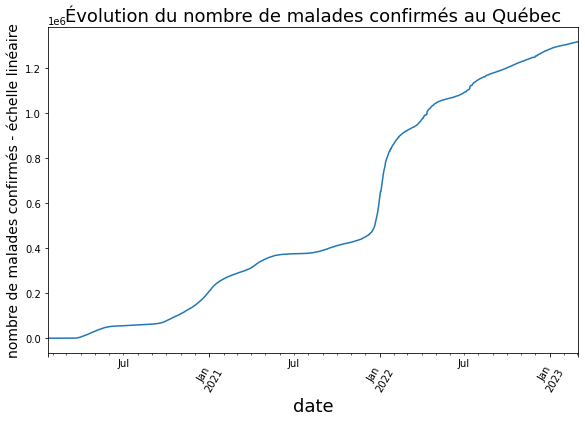

In [226]:
nombre_dor = 1.618
hauteur = 12
longueur = int(nombre_dor * hauteur)

plt.figure(figsize=(longueur/2,hauteur/2))
series.plot()
plt.title("Évolution du nombre de malades confirmés au Québec",fontsize=18)
plt.xlabel("date",fontsize=18)
plt.ylabel("nombre de malades confirmés - échelle linéaire",fontsize=14)
xticks(rotation=60)
plt.show()


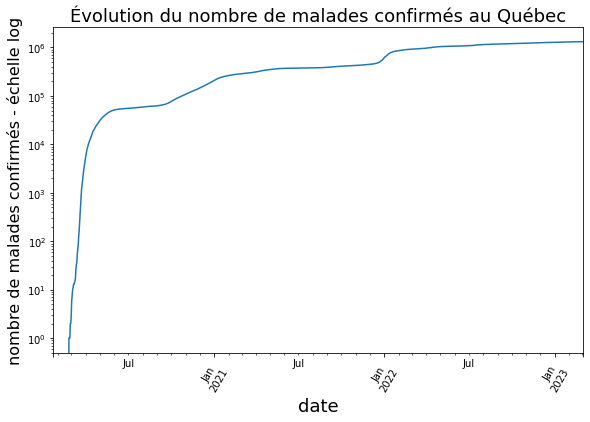

In [227]:
fig, ax = plt.subplots(figsize=(longueur/2,hauteur/2))
xticks(rotation=60)
ax.set_yscale('log')
series.plot()
plt.title("Évolution du nombre de malades confirmés au Québec",fontsize=18)
plt.xlabel("date",fontsize=18)
plt.ylabel("nombre de malades confirmés - échelle log",fontsize=16)
xticks(rotation=60)
plt.show()


 ## Modèle simple basé sur une régression et une fonction exponentielle
 ### Modéliser avec une fonction exponentielle de forme $a e^{bx}+c$ avec la fonction <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html">`scipy.optimize.curve_fit`</a>

In [228]:
nbre_points = 20
print(series[-nbre_points:])

date
2023-02-12    1308627
2023-02-13    1309008
2023-02-14    1309588
2023-02-15    1310164
2023-02-16    1310727
2023-02-17    1311210
2023-02-18    1311623
2023-02-19    1312017
2023-02-20    1312385
2023-02-21    1312991
2023-02-22    1313543
2023-02-23    1314041
2023-02-24    1314525
2023-02-25    1314974
2023-02-26    1315301
2023-02-27    1315666
2023-02-28    1316179
2023-03-01    1316793
2023-03-02    1317352
2023-03-03    1317795
dtype: int64


[ 1.79529769e+07  2.65863242e-05 -1.66442866e+07]


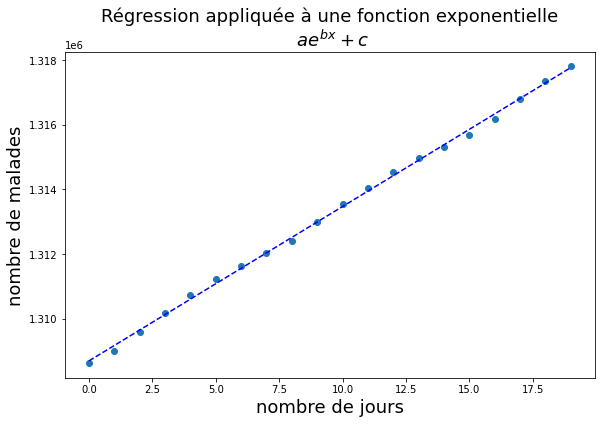

In [229]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

y_data = np.array([y for y in series[-nbre_points:].values if y > 0])
x_data = np.array([x for x in range(len(y_data))])

def func(x, a, b, c):
    return a * np.exp(b * x) + c

popt, pcov = curve_fit(func, x_data, y_data, maxfev=5000)
print(popt)

plt.figure(figsize=(longueur/2,hauteur/2))
plt.title("Régression appliquée à une fonction exponentielle\n $a e^{bx}+c$",fontsize=18)
plt.xlabel("nombre de jours",fontsize=18)
plt.ylabel("nombre de malades",fontsize=18)

plt.scatter(x_data, y_data)

_ = plt.plot(x_data, func(x_data, *popt), 'b--',
             label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

plt.show()


In [230]:
def generate_xdata_predictions(x_data,n_predictions):
    longueur_x_data = len(x_data)    
    return [nouv_x for nouv_x in range(longueur_x_data,longueur_x_data+n_predictions)]
    
n_predictions = 3
x_data_list_extended = x_data.tolist() + generate_xdata_predictions(x_data,n_predictions)
x_data_extended = np.array(x_data_list_extended)
print(list(x_data_extended))


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]


------------------------------------------------------------------------------------------
Vraies valeurs:
x=0, y=1308627
x=1, y=1309008
x=2, y=1309588
x=3, y=1310164
x=4, y=1310727
x=5, y=1311210
x=6, y=1311623
x=7, y=1312017
x=8, y=1312385
x=9, y=1312991
x=10, y=1313543
x=11, y=1314041
x=12, y=1314525
x=13, y=1314974
x=14, y=1315301
x=15, y=1315666
x=16, y=1316179
x=17, y=1316793
x=18, y=1317352
x=19, y=1317795
------------------------------------------------------------------------------------------


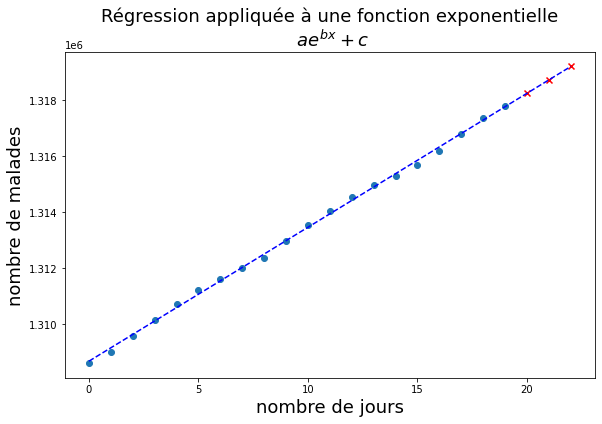

------------------------------------------------------------------------------------------
Prédictions:
x=20, y=1318238
x=21, y=1318716
x=22, y=1319194
------------------------------------------------------------------------------------------


In [231]:
plt.figure(figsize=(longueur/2,hauteur/2))
plt.title("Régression appliquée à une fonction exponentielle\n $a e^{bx}+c$",fontsize=18)
plt.xlabel("nombre de jours",fontsize=18)
plt.ylabel("nombre de malades",fontsize=18)

predictions = func(x_data_extended, *popt)

plt.scatter(x_data, y_data)

print("-"*90)
print("Vraies valeurs:")
for index in range(len(y_data)):
    print('x=%i, y=%i' % (index,y_data[index]))
print("-"*90)

plt.scatter(x_data_extended[-n_predictions:], predictions[-n_predictions:],marker="x",color="r")

_ = plt.plot(x_data_extended, predictions, 'b--',
             label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

plt.show()

print("-"*90)
print("Prédictions:")
for index in range(len(x_data),len(x_data_extended)):
    print('x=%i, y=%i' % (index,predictions[index]))
print("-"*90)


In [232]:
prediction_regNonLin_exp = int(predictions[len(x_data)])
prediction_regNonLin_exp


1318238

## Modèle ARIMA

Une méthode statistique populaire pour la prévision des séries chronologiques est le modèle ARIMA, un acronyme qui signifie AutoRegressive Integrated Moving Average, en français modèle de moyenne mobile autorégressive. Il s'agit d'une classe de modèle qui capture une suite de différentes structures temporelles dans les données d'une série chronologique. 

Trois hyperparamètres contrôlent l'algorithme ARIMA 

* p: l'ordre du modèle autorégressif (correspond au nombre de périodes antérieuses considérées)
* d: le degré de différenciation des observations brutes (soustraction d'une observation au temps t à une observation à la période de temps précédente t-1) afin de rendre la série chronologique stationnaire
* q: l'ordre de la moyenne mobile (dépendance entre une observation et l'erreur résiduelle d'une moyenne mobile apppliquée aux observations antérieures) 

Référence : 

* https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average

* https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/


### Autocorrélation
Nous pouvons calculer la corrélation pour les observations de séries chronologiques avec des observations avec des périodes de temps précédentes, appelés périodes antérieures (en anglais, lag). Étant donné que la corrélation des observations de la série chronologique est calculée avec des valeurs de la même série à des périodes antérieures, cela s'appelle une autocorrélation, (en anglais. Autocorrelation Function, ACF).

Ci-dessous, calcul et affichage de l'autocorrélation avec la fonction `.autocorrelation_plot()` de la bibliothèque Pandas.

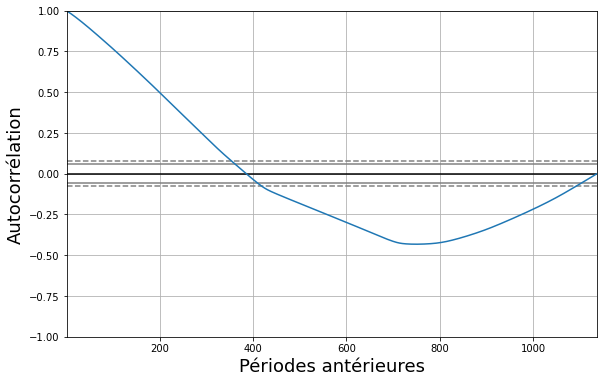

In [233]:
from pandas import read_csv
from pandas import datetime
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(longueur/2,hauteur/2))
autocorrelation_plot(series)
plt.xlabel(u'Périodes antérieures',fontsize=18)
plt.ylabel(u'Autocorrélation',fontsize=18)
plt.show()


Le même calcul et affichage de l'autocorrélation avec la fonction `.plot_acf()` de la bibliothèque statsmodels.

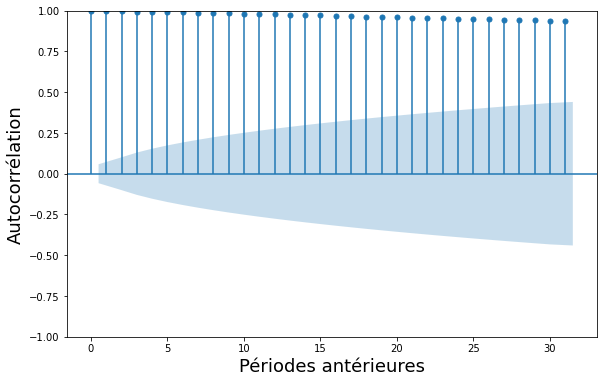

In [234]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
fig, ax = plt.subplots(figsize=(longueur/2,hauteur/2))
plot_acf(series,title='',ax=ax)
plt.xlabel(u'Périodes antérieures',fontsize=18)
plt.ylabel(u'Autocorrélation',fontsize=18)
plt.show()


### Autocorrélation partielle
Une autocorrélation partielle (en anglais. Partial Autocorrelation Function, PACF) est un résumé de la relation entre une observation dans une série chronologique avec des observations à des périodes antérieures en supprimant les relations des observations intermédiaires. Utilisation de avec la fonction `.plot_pacf()` de la bibliothèque statsmodels.

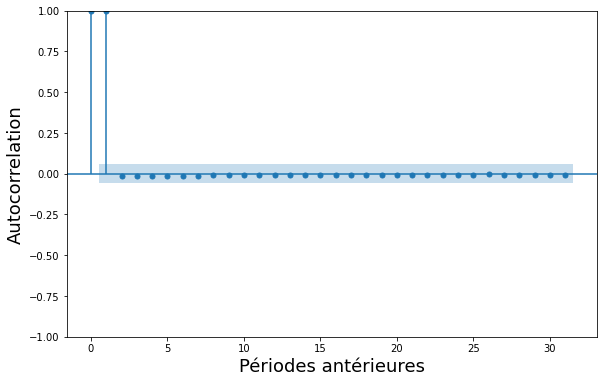

In [235]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf
fig, ax = plt.subplots(figsize=(longueur/2,hauteur/2))
try:
    plot_pacf(series,title='',ax=ax)
    plt.xlabel(u'Périodes antérieures',fontsize=18)
    plt.ylabel(u'Autocorrelation',fontsize=18)
    plt.show()
except:
    print("Matrice singulière")
    # Ajout de bruit
    series = series+1.0e-09*np.random.rand(series.shape[0])
    plot_pacf(series,title='',ax=ax)
    plt.xlabel(u'Périodes antérieures',fontsize=18)
    plt.ylabel(u'Autocorrelation',fontsize=18)
    plt.show()


### Auto ARIMA

Auto ARIMA calcule les meilleurs modèles ARIMA à partir des données et de contraintes sur les hyperparamètres (p,d,q) de ARIMA selon diférents critères comme le <a href="https://fr.wikipedia.org/wiki/Crit%C3%A8re_d%27information_d%27Akaike">critère d'information d'Akaike</a> (Akaike information criterion ou AIC) 

In [236]:
!pip3 install pmdarima

Installer la bibliothèque Python auto_arima

#> sudo pip3 install pyramid-arima - deprecated

   > sudo pip3 install pmdarima
   
Documentation: https://alkaline-ml.com/pmdarima/0.9.0/tips_and_tricks.html#tips-and-tricks

Prise en main rapide: https://alkaline-ml.com/pmdarima/0.9.0/quickstart.html


In [237]:
from io import StringIO
import sys

sortie_standard = sys.stdout
sortie_autoarima = StringIO()
sys.stdout =  sortie_autoarima

# import pyramid as pm - deprecated
import pmdarima as pm
print("pmdarima version:",pm.__version__)
print()
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Entraîner auto-ARIMA
meilleur_ARIMA = pm.auto_arima(series, start_p=1, start_q=1,
                               max_p=3, max_q=3, m=100,
                               start_P=0, seasonal=False,
                               d=1, D=1, trace=True,
                               error_action='ignore',  # pas de message d'erreur sur
                               suppress_warnings=True, # pas de message de non convergence
                               stepwise=True)  # calcul pas à pas

# Restaurer la sortie standard
sys.stdout = sortie_standard

# Récupérer la sortie autoarima 
sortie_autoarima_str = sortie_autoarima.getvalue()

print(sortie_autoarima_str)

meilleur_ARIMA.summary()


/usr/local/lib/python3.8/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (100) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


pmdarima version: 1.8.3

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=19009.976, Time=0.91 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=20504.343, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=19327.111, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=19950.294, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=20829.951, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=19011.986, Time=1.37 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=19012.148, Time=1.28 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=19678.756, Time=0.91 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=19135.418, Time=0.18 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=19013.470, Time=1.95 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=19011.126, Time=0.32 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 7.524 seconds



<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1137
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -9500.988
Date:                Sat, 04 Mar 2023   AIC                          19009.976
Time:                        12:34:51   BIC                          19030.117
Sample:                             0   HQIC                         19017.583
                               - 1137                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     21.4628     21.649      0.991      0.321     -20.969      63.894
ar.L1          0.9813      0.003    343.898      0.000       0.976       0.987
ma.L1         -0.6645      0.008    -85.433      0.000      -0.680      -0.649
sigma2      1.076e+06   1.12e+04     95.878      0.000    1.05e+06     1.1e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            228091.42
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):              75.66   Skew:                             1.02
Prob(H) (two-sided):                  0.00   Kurtosis:                        72.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [238]:
import re

liste_resultats_ARIMA = sortie_autoarima_str.split('\n')
# motif_extraction = "order=\((\d),\s(\d),\s(\d)\);\s*AIC=(\d*\.\d*|nan)" 
motif_extraction = "ARIMA\((\d),(\d),(\d)\).*AIC=(\d*\.\d*|nan)" 

p = re.compile(motif_extraction)

meilleurs_ARIMA_dict = {}
for resultat_ARIMA_brut in liste_resultats_ARIMA:
    if p.findall(resultat_ARIMA_brut):
        resultat_ARIMA = p.findall(resultat_ARIMA_brut)[0]
        arima_etiq = "_".join(resultat_ARIMA[:3])
        aic = resultat_ARIMA[3]
        if aic == "nan":
            aic = 10000000
        meilleurs_ARIMA_dict[arima_etiq]=int(float(aic))
meilleurs_ARIMA_list = list({k: v for k, v in sorted(meilleurs_ARIMA_dict.items(), key=lambda item: item[1])})
#meilleurs_ARIMA_list[:2]

meilleurs_ARIMA = []
#for meilleur_arima in meilleurs_ARIMA_list[:2]:
for meilleur_arima in meilleurs_ARIMA_list:
    print(meilleur_arima.split('_'))
    meilleurs_ARIMA += [tuple([int(carac) for carac in meilleur_arima.split('_')])]
meilleurs_ARIMA


['1', '1', '1']
['2', '1', '1']
['1', '1', '2']
['2', '1', '2']
['2', '1', '0']
['1', '1', '0']
['0', '1', '2']
['0', '1', '1']
['0', '1', '0']


[(1, 1, 1),
 (2, 1, 1),
 (1, 1, 2),
 (2, 1, 2),
 (2, 1, 0),
 (1, 1, 0),
 (0, 1, 2),
 (0, 1, 1),
 (0, 1, 0)]

In [239]:
meilleurs_ARIMA

[(1, 1, 1),
 (2, 1, 1),
 (1, 1, 2),
 (2, 1, 2),
 (2, 1, 0),
 (1, 1, 0),
 (0, 1, 2),
 (0, 1, 1),
 (0, 1, 0)]

### Entraînement du meilleur modèle ARIMA

Le critère de sélection selon le <a href="https://fr.wikipedia.org/wiki/Crit%C3%A8re_d%27information_d%27Akaike">critère d'information d'Akaike</a> (Akaike information criterion ou AIC). On ne conserve que les deux ou trois meilleurs modèles ARIMAselon ce critère qui doit être minimisé.

Certains modèles ARIMA sont retirés car ils ne convergent pas (`LinAlgError: SVD did not converge`) ou parce que le modèle n'est pas stationnaire.

******************************************************************************************
Modèle meilleur_ARIMA: (1, 1, 1)
Nombre de jours écoulés=727, t=0, prédiction=912951, vraie valeur=912461
Modèle meilleur_ARIMA: (1, 1, 1)
Nombre de jours écoulés=728, t=1, prédiction=913798, vraie valeur=913899
Modèle meilleur_ARIMA: (1, 1, 1)
Nombre de jours écoulés=729, t=2, prédiction=915259, vraie valeur=915760
Modèle meilleur_ARIMA: (1, 1, 1)
Nombre de jours écoulés=730, t=3, prédiction=917303, vraie valeur=917277
Modèle meilleur_ARIMA: (1, 1, 1)
Nombre de jours écoulés=731, t=4, prédiction=918789, vraie valeur=918819
Modèle meilleur_ARIMA: (1, 1, 1)
Nombre de jours écoulés=732, t=5, prédiction=920324, vraie valeur=918819
Modèle meilleur_ARIMA: (1, 1, 1)
Nombre de jours écoulés=733, t=6, prédiction=919701, vraie valeur=921030
Modèle meilleur_ARIMA: (1, 1, 1)
Nombre de jours écoulés=734, t=7, prédiction=922432, vraie valeur=921875
Modèle meilleur_ARIMA: (1, 1, 1)
Nombre de jours écoulés=735,

Nombre de jours écoulés=804, t=77, prédiction=1053061, vraie valeur=1052634
Modèle meilleur_ARIMA: (1, 1, 1)
Nombre de jours écoulés=805, t=78, prédiction=1053519, vraie valeur=1053406
Modèle meilleur_ARIMA: (1, 1, 1)
Nombre de jours écoulés=806, t=79, prédiction=1054240, vraie valeur=1054507
Modèle meilleur_ARIMA: (1, 1, 1)
Nombre de jours écoulés=807, t=80, prédiction=1055423, vraie valeur=1055274
Modèle meilleur_ARIMA: (1, 1, 1)
Nombre de jours écoulés=808, t=81, prédiction=1056125, vraie valeur=1056174
Modèle meilleur_ARIMA: (1, 1, 1)
Nombre de jours écoulés=809, t=82, prédiction=1057031, vraie valeur=1056972
Modèle meilleur_ARIMA: (1, 1, 1)
Nombre de jours écoulés=810, t=83, prédiction=1057797, vraie valeur=1057606
Modèle meilleur_ARIMA: (1, 1, 1)
Nombre de jours écoulés=811, t=84, prédiction=1058353, vraie valeur=1058063
Modèle meilleur_ARIMA: (1, 1, 1)
Nombre de jours écoulés=812, t=85, prédiction=1058698, vraie valeur=1058691
Modèle meilleur_ARIMA: (1, 1, 1)
Nombre de jours éco

Nombre de jours écoulés=879, t=152, prédiction=1136840, vraie valeur=1136337
Modèle meilleur_ARIMA: (1, 1, 1)
Nombre de jours écoulés=880, t=153, prédiction=1138298, vraie valeur=1137615
Modèle meilleur_ARIMA: (1, 1, 1)
Nombre de jours écoulés=881, t=154, prédiction=1139322, vraie valeur=1138880
Modèle meilleur_ARIMA: (1, 1, 1)
Nombre de jours écoulés=882, t=155, prédiction=1140417, vraie valeur=1140647
Modèle meilleur_ARIMA: (1, 1, 1)
Nombre de jours écoulés=883, t=156, prédiction=1142240, vraie valeur=1142427
Modèle meilleur_ARIMA: (1, 1, 1)
Nombre de jours écoulés=884, t=157, prédiction=1144061, vraie valeur=1144098
Modèle meilleur_ARIMA: (1, 1, 1)
Nombre de jours écoulés=885, t=158, prédiction=1145723, vraie valeur=1145558
Modèle meilleur_ARIMA: (1, 1, 1)
Nombre de jours écoulés=886, t=159, prédiction=1147106, vraie valeur=1146894
Modèle meilleur_ARIMA: (1, 1, 1)
Nombre de jours écoulés=887, t=160, prédiction=1148351, vraie valeur=1147838
Modèle meilleur_ARIMA: (1, 1, 1)
Nombre de 

Nombre de jours écoulés=954, t=227, prédiction=1205851, vraie valeur=1206000
Modèle meilleur_ARIMA: (1, 1, 1)
Nombre de jours écoulés=955, t=228, prédiction=1206923, vraie valeur=1207016
Modèle meilleur_ARIMA: (1, 1, 1)
Nombre de jours écoulés=956, t=229, prédiction=1207957, vraie valeur=1207949
Modèle meilleur_ARIMA: (1, 1, 1)
Nombre de jours écoulés=957, t=230, prédiction=1208875, vraie valeur=1208580
Modèle meilleur_ARIMA: (1, 1, 1)
Nombre de jours écoulés=958, t=231, prédiction=1209396, vraie valeur=1209293
Modèle meilleur_ARIMA: (1, 1, 1)
Nombre de jours écoulés=959, t=232, prédiction=1210064, vraie valeur=1210085
Modèle meilleur_ARIMA: (1, 1, 1)
Nombre de jours écoulés=960, t=233, prédiction=1210853, vraie valeur=1211181
Modèle meilleur_ARIMA: (1, 1, 1)
Nombre de jours écoulés=961, t=234, prédiction=1212047, vraie valeur=1212417
Modèle meilleur_ARIMA: (1, 1, 1)
Nombre de jours écoulés=962, t=235, prédiction=1213393, vraie valeur=1213474
Modèle meilleur_ARIMA: (1, 1, 1)
Nombre de 

Nombre de jours écoulés=1029, t=302, prédiction=1273824, vraie valeur=1274140
Modèle meilleur_ARIMA: (1, 1, 1)
Nombre de jours écoulés=1030, t=303, prédiction=1275175, vraie valeur=1275579
Modèle meilleur_ARIMA: (1, 1, 1)
Nombre de jours écoulés=1031, t=304, prédiction=1276730, vraie valeur=1276752
Modèle meilleur_ARIMA: (1, 1, 1)
Nombre de jours écoulés=1032, t=305, prédiction=1277895, vraie valeur=1277720
Modèle meilleur_ARIMA: (1, 1, 1)
Nombre de jours écoulés=1033, t=306, prédiction=1278792, vraie valeur=1277720
Modèle meilleur_ARIMA: (1, 1, 1)
Nombre de jours écoulés=1034, t=307, prédiction=1278434, vraie valeur=1277720
Modèle meilleur_ARIMA: (1, 1, 1)
Nombre de jours écoulés=1035, t=308, prédiction=1278196, vraie valeur=1279432
Modèle meilleur_ARIMA: (1, 1, 1)
Nombre de jours écoulés=1036, t=309, prédiction=1280297, vraie valeur=1280200
Modèle meilleur_ARIMA: (1, 1, 1)
Nombre de jours écoulés=1037, t=310, prédiction=1281023, vraie valeur=1281152
Modèle meilleur_ARIMA: (1, 1, 1)
N

meilleur_ARIMA (1, 1, 1)
Nombre de jours écoulés=1103, t=376, prédiction=1318269
Modèle meilleur_ARIMA: (1, 1, 1)
meilleur_ARIMA (1, 1, 1)
Nombre de jours écoulés=1104, t=377, prédiction=1318738
Modèle meilleur_ARIMA: (1, 1, 1)
meilleur_ARIMA (1, 1, 1)
Nombre de jours écoulés=1105, t=378, prédiction=1319200
Test RMSE: 1172.635


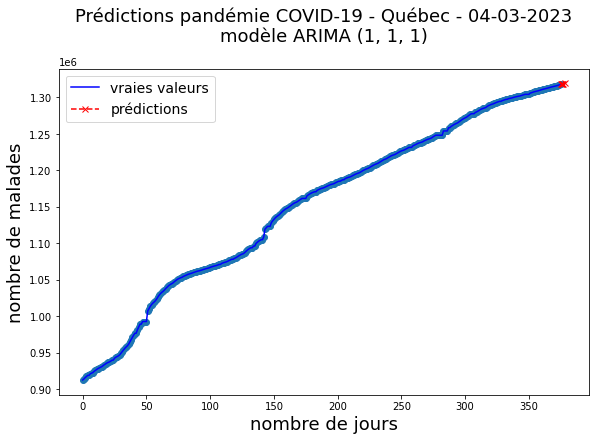

******************************************************************************************


In [240]:
from pandas import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from numpy.linalg import LinAlgError
from math import sqrt

X = series.values
X = [x for x in X if x > 0]

# Ici au besoin, on peut ajouter manuellement un nouveau point de données
# X += [3430]
taille_entrainement_data = int(len(X) * 0.66)

# Séparation entre jeu de données d'entraînement et jeu de données de test
entrainement_data, test_data = X[0:taille_entrainement_data], X[taille_entrainement_data:len(X)]

predictions_ARIMA = {}
print("*"*90)

for meilleur_ARIMA in meilleurs_ARIMA:
    drapeau_erreur = False
    historique = [x for x in entrainement_data]
    predictions = list()
    nbr_predictions = 3
    nbr_jours_init = len(X)-len(test_data)

    for t in range(len(test_data)+nbr_predictions):
        try:
            print("Modèle meilleur_ARIMA:",meilleur_ARIMA)
            modele_ARIMA = ARIMA(historique, order=meilleur_ARIMA)
            # modele_ARIMA_entraine = modele_ARIMA.fit(disp=0)
            modele_ARIMA_entraine = modele_ARIMA.fit()
            sortie = modele_ARIMA_entraine.forecast()
            une_prediction = sortie[0]
            predictions.append(une_prediction)
            if t < len(test_data):
                vraie_valeur = test_data[t]
                historique.append(vraie_valeur)
                print('Nombre de jours écoulés=%i, t=%i, prédiction=%i, vraie valeur=%i' % (nbr_jours_init+t,t,une_prediction,vraie_valeur))
            else:
                historique.append(une_prediction)
                print("meilleur_ARIMA",meilleur_ARIMA)
                etiq_ARIMA = "_".join([str(hyperparam) for hyperparam in meilleur_ARIMA])
                if not etiq_ARIMA in predictions_ARIMA.keys():
                    predictions_ARIMA[etiq_ARIMA]=int(une_prediction)
                print('Nombre de jours écoulés=%i, t=%i, prédiction=%i' % (nbr_jours_init+t,t,une_prediction))
        except:
            print("*** Erreur! ***")
            drapeau_erreur = True
            break
    if drapeau_erreur:
        continue
    else:   
        # Évaluation de l'erreur de prédiction
        rmse = sqrt(mean_squared_error(test_data, predictions[:-nbr_predictions]))
        print('Test RMSE: %.3f' % rmse)
        # Afficher les vraies valeurs et les prédictions pour le jeu de données de test
        plt.figure(figsize=(longueur/2,hauteur/2))
        date = (dates_list[-1]+pd.Timedelta(days=1)).strftime("%d-%m-%Y")
        plt.title(u"Prédictions pandémie COVID-19 - Québec - " + date + "\n" + 
                  "modèle ARIMA (" + etiq_ARIMA.replace("_",", ") + ")\n",fontsize=18)
        x_data = list(range(len(test_data)))
        x_data_extension = list(range(len(test_data)+nbr_predictions))[-nbr_predictions:]
        plt.scatter(x_data,test_data)
        plt.plot(test_data,color='blue',label="vraies valeurs")
        plt.plot(x_data_extension[-nbr_predictions:],
                 predictions[-nbr_predictions:],
                 "r--",marker="x",label="prédictions")
        point1 = [x_data[-1], test_data[-1]]
        point2 = [x_data_extension[0],int(predictions[-nbr_predictions])]
        x_values = [point1[0], point2[0]]
        y_values = [point1[1], point2[1]]
        plt.plot(x_values, y_values,"r--",marker="x")
        plt.legend(loc='best',fontsize=14)
        plt.xlabel("nombre de jours",fontsize=18)
        plt.ylabel("nombre de malades",fontsize=18)
        plt.show()
        print("*"*90)
        break

### Afficher les vraies valeurs et la prédiction pour demain

#### Modèle meilleurs ARIMA seulement

In [241]:
# Composante du modèle exponentiel
ponderation_exp = 0
total_predictions = prediction_regNonLin_exp * ponderation_exp
#total_predictions = 0 
# print("Prédictions régr. non-lin.: ",prediction_regNonLin_exp)
for etiq_ARIMA in predictions_ARIMA.keys():
    print("Prédictions ARIMA: (" + etiq_ARIMA.replace("_",", ") + ") : " + str(predictions_ARIMA[etiq_ARIMA]))
    total_predictions += predictions_ARIMA[etiq_ARIMA]
print("Prédictions pour "+(dates_list[-1]+pd.Timedelta(days=1)).strftime("%d-%m-%Y"))
# Modèle exponentiel utilisé avant le 1er avril 2020
# ligne commentée
prediction_pur_ARIMA = int(total_predictions/(len(predictions_ARIMA)+1*ponderation_exp))
print(" => ",prediction_pur_ARIMA," <= ")
#print(" => ",int(total_predictions/len(predictions_ARIMA))," <= ")


Prédictions ARIMA: (1, 1, 1) : 1318269
Prédictions pour 04-03-2023
 =>  1318269  <= 


### Afficher les vraies valeurs et la prédiction pour demain

#### Modèle meilleurs ARIMA

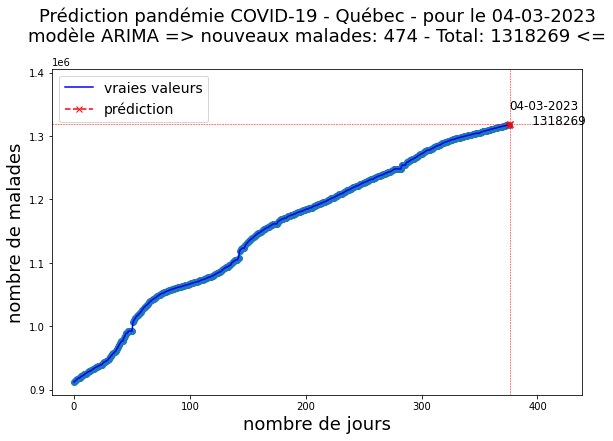

In [242]:
plt.figure(figsize=(longueur/2,hauteur/2))
date_demain = (dates_list[-1]+pd.Timedelta(days=1)).strftime("%d-%m-%Y")
prediction_demain = prediction_pur_ARIMA
x_data = list(range(len(test_data)))
x_data_extension = list(range(len(test_data)+nbr_predictions))[-nbr_predictions:]
plt.scatter(x_data,test_data)
plt.plot(test_data,color='blue',label="vraies valeurs")
point1 = [x_data[-1], test_data[-1]]
point2 = [x_data_extension[0],prediction_demain]
x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]
plt.plot(x_values, y_values,"r--",marker="x",label="prédiction")
plt.axhline(prediction_demain,linestyle='--',linewidth=0.5,color='r')
plt.axvline(x=point2[0],linestyle='--',linewidth=0.5,color='r')
plt.text(point2[0]-0.5, point2[1], date_demain + "\n" +" "*6 + str(prediction_demain),fontsize=12)
plt.plot(x_values, y_values,"r--",marker="x")
xlim(right=point2[0]+x_values[-1]/6)
ylim(top=point2[1]+y_values[-1]/15)
plt.legend(loc='best',fontsize=14)
plt.xlabel("nombre de jours",fontsize=18)
plt.ylabel("nombre de malades",fontsize=18)
plt.title(u"Prédiction pandémie COVID-19 - Québec - pour le " + date_demain + "\n" + 
          "modèle ARIMA => nouveaux malades: " + str(prediction_demain-test_data[-1]) + " - Total: "+ str(prediction_demain) + " <=\n",fontsize=18)
plt.savefig('images/Prediction-ARIMA_seul-COVID19-Quebec.png')
plt.show()


## Modèle combiné 

Moyenne des prédictions du meilleur modèle ARIMA plus une partie exponentielle issue d'un calcul de régression non linéaire. 

<!--
Les résultats depuis quelques mois semblent confirmer que le modèle combiné est plus réaliste, du moins à ce stade de l'épidémie au Québec.
-->

In [243]:
# Composante du modèle exponentiel
ponderation_exp = 1.0
ponderation_arima = 9.0
total_predictions = prediction_regNonLin_exp * ponderation_exp
print("Prédictions régr. non-lin.: ",prediction_regNonLin_exp-y_data[-1])
print("Prédictions pur ARIMA: ",prediction_pur_ARIMA-y_data[-1])
total_predictions += prediction_pur_ARIMA*ponderation_arima
print("Prédictions pour "+(dates_list[-1]+pd.Timedelta(days=1)).strftime("%d-%m-%Y"))
# Modèle exponentiel utilisé avant le 1er avril 2020
# ligne commentée
prediction_modele_combine = int(total_predictions/(ponderation_exp+ponderation_arima))
print("Prédictions modèle combiné: ",prediction_modele_combine-y_data[-1])
print("Nouveaux malades => ",prediction_modele_combine-y_data[-1]," <= ")


Prédictions régr. non-lin.:  443
Prédictions pur ARIMA:  474
Prédictions pour 04-03-2023
Prédictions modèle combiné:  470
Nouveaux malades =>  470  <= 


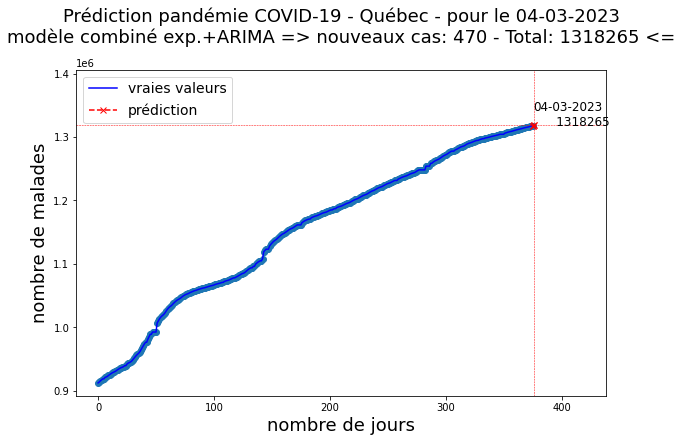

In [244]:
plt.figure(figsize=(longueur/2,hauteur/2))
date_demain = (dates_list[-1]+pd.Timedelta(days=1)).strftime("%d-%m-%Y")
prediction_demain = prediction_modele_combine
x_data = list(range(len(test_data)))
x_data_extension = list(range(len(test_data)+nbr_predictions))[-nbr_predictions:]
plt.scatter(x_data,test_data)
plt.plot(test_data,color='blue',label="vraies valeurs")
point1 = [x_data[-1], test_data[-1]]
point2 = [x_data_extension[0],prediction_demain]
x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]
plt.plot(x_values, y_values,"r--",marker="x",label="prédiction")
plt.axhline(prediction_demain,linestyle='--',linewidth=0.5,color='r')
plt.axvline(x=point2[0],linestyle='--',linewidth=0.5,color='r')
plt.text(point2[0]-0.5, point2[1], date_demain + "\n" +" "*6 + str(prediction_demain),fontsize=12)
plt.plot(x_values, y_values,"r--",marker="x")
xlim(right=point2[0]+x_values[-1]/6)
ylim(top=point2[1]+y_values[-1]/15)
plt.legend(loc='best',fontsize=14)
plt.xlabel("nombre de jours",fontsize=18)
plt.ylabel("nombre de malades",fontsize=18)
plt.title(u"Prédiction pandémie COVID-19 - Québec - pour le " + date_demain + "\n" + 
          "modèle combiné exp.+ARIMA => nouveaux cas: " + str(prediction_demain-test_data[-1]) + " - Total: "+ str(prediction_demain) + " <=\n",fontsize=18)
plt.savefig('images/Prediction-modele_combine-COVID19-Quebec.png')
plt.show()


In [245]:
print("Fin du carnet IPython")

Fin du carnet IPython
